In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## Question1A

In [13]:
# Read data from file
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')

# Define five initial centroids as given 
centroids = np.array([
    [10, 10],
    [-10, -10],
    [2, 2],
    [3, 3],
    [-3, -3]
])
k = 5

for i in range(100):
    # Calculate distances between data points and centroids
    distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
    # Find the index of the nearest centroid for each data point
    nearest_centroid_index = np.argmin(distances, axis=0)
    # Assign each data point to the nearest cluster
    clusters = nearest_centroid_index  
    # Update centroids based on mean of data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[clusters == j], axis=0)

print('Clusters:', clusters)
print('Centroids:', centroids)


Clusters: [4 1 4 ... 3 1 1]
Centroids: [[ 26  -1]
 [-30   2]
 [  0  -2]
 [ 11  -1]
 [-12   0]]


## Question1B

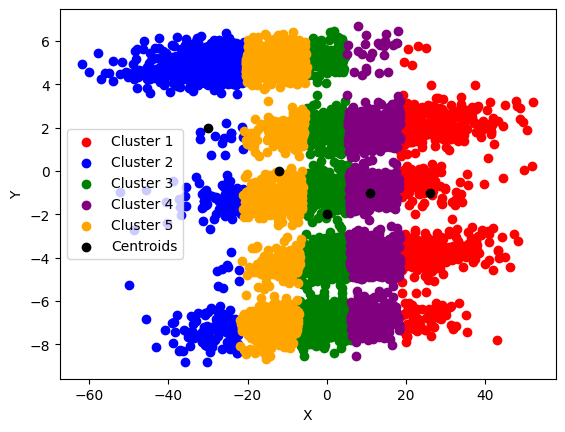

In [14]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(k):
    plt.scatter(data[clusters == i, 0], data[clusters == i, 1], color=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='o')


plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Centroids'])
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Question1C

Based on the plot shown above, there appear to be five distinct subgroups in the data, which suggests that setting k=5 (the number of clusters) is a good choice.

However, there are different ways to initialize the centroids for k-means clustering. Manual initialization was used in this case, but other methods like k-means++ may be more effective at choosing centroids that better represent the data and improve clustering results.

# Question 2

## Question2A

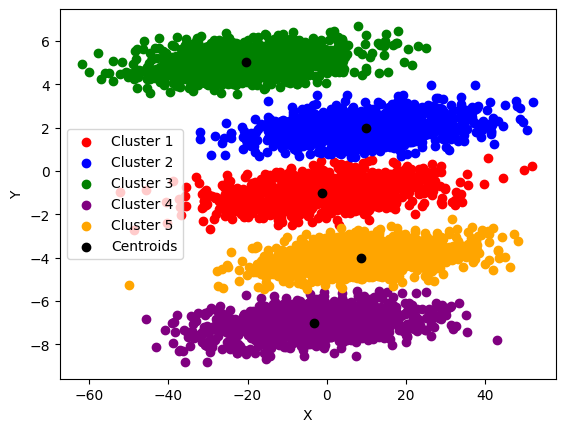

In [49]:
k = 5
P = np.array([
    [10, 0.5],
    [-10, 0.25]
]).astype('float64')

def mahalanobis_distance(x, y):
    diff = x - y
    return np.dot(np.dot(diff, np.linalg.inv(P.T @ P)), diff.T)

# Initialize centroids randomly
centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
labels = np.zeros(data.shape[0])
for i in range(100):
    # Calculate distances between data points and centroids
    distances = np.zeros((data.shape[0], k))
    for j in range(k):
        distances[:, j] = np.apply_along_axis(mahalanobis_distance, 1, data, centroids[j])

    # Assign each data point to the nearest cluster
    labels = np.argmin(distances, axis=1)

    # Update centroids based on mean of data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[labels == j], axis=0)

data_copy = data

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i])

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='o')

plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Centroids'])
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


## Question2B

In [51]:
from sklearn.decomposition import PCA
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')
calculate_pca = PCA()
calculate_pca.fit(data)
print(calculate_pca.components_)

[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


## Question2C

In [54]:
# Load data
for i in range(5):
    calculate_pca = PCA()
    calculate_pca.fit(data_copy[clusters==i])
    print(calculate_pca.components_)


[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
[[-0.99876417 -0.04970051]
 [ 0.04970051 -0.99876417]]
[[-0.99983126 -0.01837009]
 [ 0.01837009 -0.99983126]]
[[ 0.99988771  0.01498536]
 [-0.01498536  0.99988771]]
[[ 0.99994891  0.01010819]
 [ 0.01010819 -0.99994891]]


It can be seen that the PCA for each cluster is not the same as the original data.

## Question2d

In [64]:

P = np.array([
    [10, 0.5],
    [-10, 0.25]
])

eigenvals, eigenvecs = np.linalg.eig(P.T)
L = np.diag(eigenvals)
P_prime = np.dot(L, eigenvecs.T)

print("Original P:")
print(P)
print("\nNew P':")
print(P_prime)

Original P:
[[ 10.     0.5 ]
 [-10.     0.25]]

New P':
[[9.44301625 0.51282107]
 [0.58344264 0.53717161]]


# Question 3

## Question3A

To generate candidate 4-itemsets using the Fk−1 × F1 merging strategy in Apriori, we combine each frequent 3-itemset with each frequent 1-itemset in the dataset, keeping only the sets that have 4 distinct elements. The frequent 1-itemsets in this case are {1}, {2}, {3}, {4}, and {5}.

To obtain candidate 4-itemsets, we join each frequent 3-itemset with each frequent 1-itemset that shares the first 2 items.

The list of candidate 4-itemsets obtained using the Fk-1 × F1 merging strategy is:
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}.

## Question3B

To generate candidate 4-itemsets using the Fk-1 × Fk-1 merging strategy, we need to combine each frequent 3-itemset with each frequent 3-itemset in F3 that shares the first 2 items, but only keep the sets that have 4 distinct elements.

The complete list of candidate 4-itemsets obtained using the Fk-1 × Fk-1 merging strategy is:
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {2, 3, 4, 5}

## Question3C
After the candidate pruning step in the Apriori algorithm, only the 4-itemset {1, 2, 3, 4} remains as it is the only one that is also a frequent itemset in the original set of frequent 3-itemsets. The other candidate 4-itemsets have at least one subset that is not a frequent itemset and are thus pruned.

# Question 4

## Question4A
The maximum number of association rules that can be extracted from a dataset with n items is 3^n - 2^(n+1) + 1. In this dataset, there are 5 unique items, so the maximum number of association rules that can be extracted is:

3^7 - 2^(7+1) + 1 = 1932

Therefore, there can be a maximum of 1932 association rules extracted from this data.

## Question4B

Confidence({Milk, Diapers} ⇒ {Butter}) = Support({Milk, Diapers, Butter}) / Support({Milk, Diapers}) = (2 / 4) * 100% = 50%

## Question4C
The support of {Milk, Diapers} ⇒ {Butter} is the percentage of transactions that contain all three items.

Support({Milk, Diapers, Butter}) = (2 / 10) * 100% = 20%


## Question4D
True.

If {a, b, c, d} is a frequent itemset, then all of its subsets, including {a, b}, is a frequent itemset.

## Question4E
False.

Even if {a,b}, {b,c}, and {a,c} are frequent itemsets, we still do not know its joint set is frequent.

## Question4F
False.

We cannot determine the exact value of the support of {b} from the given information. We can only say that the support of {b} is in the range [20, 30].

## Questinon4G
False.

The maximum number of size-2 frequent itemsets that can be extracted from a dataset with 5 items is actually 10. 

## Question4H
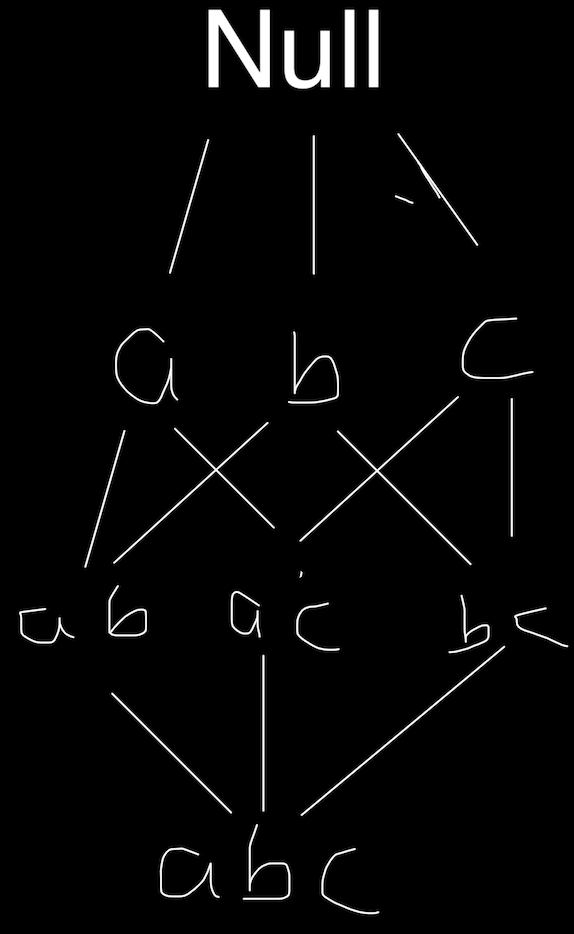
